In [5]:
import pandas as pd
import numpy as np
import torch
import os
import random 
import seaborn as sns
import matplotlib.pyplot as plt

# PREPROCESSING DURANTE L'IMPORTAZIONE

In [55]:
'''# importo tutti i dataset benigni per crearne uno unico benigno
cartella = ' ./' 
dataset_benigno = pd.DataFrame()
for file_name in os.listdir(cartella):
    if file_name.endswith('.csv'):
        print("importazione:", file_name)
        file_path = os.path.join(cartella, file_name)   
        df_sampled = pd.read_csv(file_path)        
        dataset_benigno = pd.concat([dataset_benigno, df_sampled])'''

'# importo tutti i dataset benigni per crearne uno unico benigno\ncartella = \' ./\' \ndataset_benigno = pd.DataFrame()\nfor file_name in os.listdir(cartella):\n    if file_name.endswith(\'.csv\'):\n        print("importazione:", file_name)\n        file_path = os.path.join(cartella, file_name)   \n        df_sampled = pd.read_csv(file_path)        \n        dataset_benigno = pd.concat([dataset_benigno, df_sampled])'

In [56]:
'''len(dataset_benigno)'''

'len(dataset_benigno)'

In [57]:
'''cartella = '01-12' 
sample_size_per_file = 15000
dataset_finale_maligno = pd.DataFrame()
for file_name in os.listdir(cartella):
    if file_name.endswith('.csv'):
        print("importazione:", file_name)
        file_path = os.path.join(cartella, file_name)        
        num_lines = sum(1 for _ in open(file_path)) - 1
        skip = sorted(random.sample(range(1, num_lines + 1), num_lines - sample_size_per_file))        
        df_sampled = pd.read_csv(file_path, skiprows=skip)

        
        dataset_finale_maligno = pd.concat([dataset_benigno, df_sampled])

dataset_finale_maligno.to_csv("dataset_finale_maligno.csv", index=False)'''

'cartella = \'01-12\' \nsample_size_per_file = 15000\ndataset_finale_maligno = pd.DataFrame()\nfor file_name in os.listdir(cartella):\n    if file_name.endswith(\'.csv\'):\n        print("importazione:", file_name)\n        file_path = os.path.join(cartella, file_name)        \n        num_lines = sum(1 for _ in open(file_path)) - 1\n        skip = sorted(random.sample(range(1, num_lines + 1), num_lines - sample_size_per_file))        \n        df_sampled = pd.read_csv(file_path, skiprows=skip)\n\n        \n        dataset_finale_maligno = pd.concat([dataset_benigno, df_sampled])\n\ndataset_finale_maligno.to_csv("dataset_finale_maligno.csv", index=False)'

In [58]:
'''dataset_finale_maligno=pd.read_csv("dataset_finale_maligno.csv")'''

'dataset_finale_maligno=pd.read_csv("dataset_finale_maligno.csv")'

In [59]:
'''dataset_finale_maligno[" Label"].value_counts()'''

'dataset_finale_maligno[" Label"].value_counts()'

In [60]:
'''columns_to_drop = dataset_finale_maligno.select_dtypes(include=['object']).columns
columns_to_drop = columns_to_drop[columns_to_drop != ' Label']  # Esclude 'label'
dataset_finale_maligno.drop(columns=columns_to_drop, inplace=True)'''

"columns_to_drop = dataset_finale_maligno.select_dtypes(include=['object']).columns\ncolumns_to_drop = columns_to_drop[columns_to_drop != ' Label']  # Esclude 'label'\ndataset_finale_maligno.drop(columns=columns_to_drop, inplace=True)"

In [61]:
'''dataset_finale_maligno[" Label"].value_counts()'''

'dataset_finale_maligno[" Label"].value_counts()'

In [42]:
'''dataset_finale_maligno.replace("infinity", -1, inplace=True)
dataset_finale_maligno = dataset_finale_maligno.loc[:, dataset_finale_maligno.nunique() > 1]'''

In [62]:
'''dataset_finale_maligno[" Label"].value_counts()'''

'dataset_finale_maligno[" Label"].value_counts()'

In [48]:
'''# Mantieni tutte le colonne eccetto le prime 4
dataset_finale_maligno = dataset_finale_maligno.iloc[:, 4:]'''

In [63]:
'''dataset_finale_maligno.dtypes'''

'dataset_finale_maligno.dtypes'

In [64]:
'''dataset_finale_maligno.to_csv("dataset_finale_maligno.csv")'''

'dataset_finale_maligno.to_csv("dataset_finale_maligno.csv")'

# CALCOLARE LA CORRELAZIONE

In [52]:
dataset_finale_maligno=pd.read_csv("dataset_finale_maligno.csv")

In [54]:
dataset_finale_maligno[" Label"].value_counts()

 Label
BENIGN           32041
UDP-lag          23761
DrDoS_NetBIOS     9998
DrDoS_SSDP        9997
DrDoS_MSSQL       9997
DrDoS_SNMP        9996
DrDoS_UDP         9994
DrDoS_LDAP        9993
DrDoS_DNS         9992
TFTP              9976
DrDoS_NTP         9863
Syn               8660
WebDDoS             25
Name: count, dtype: int64

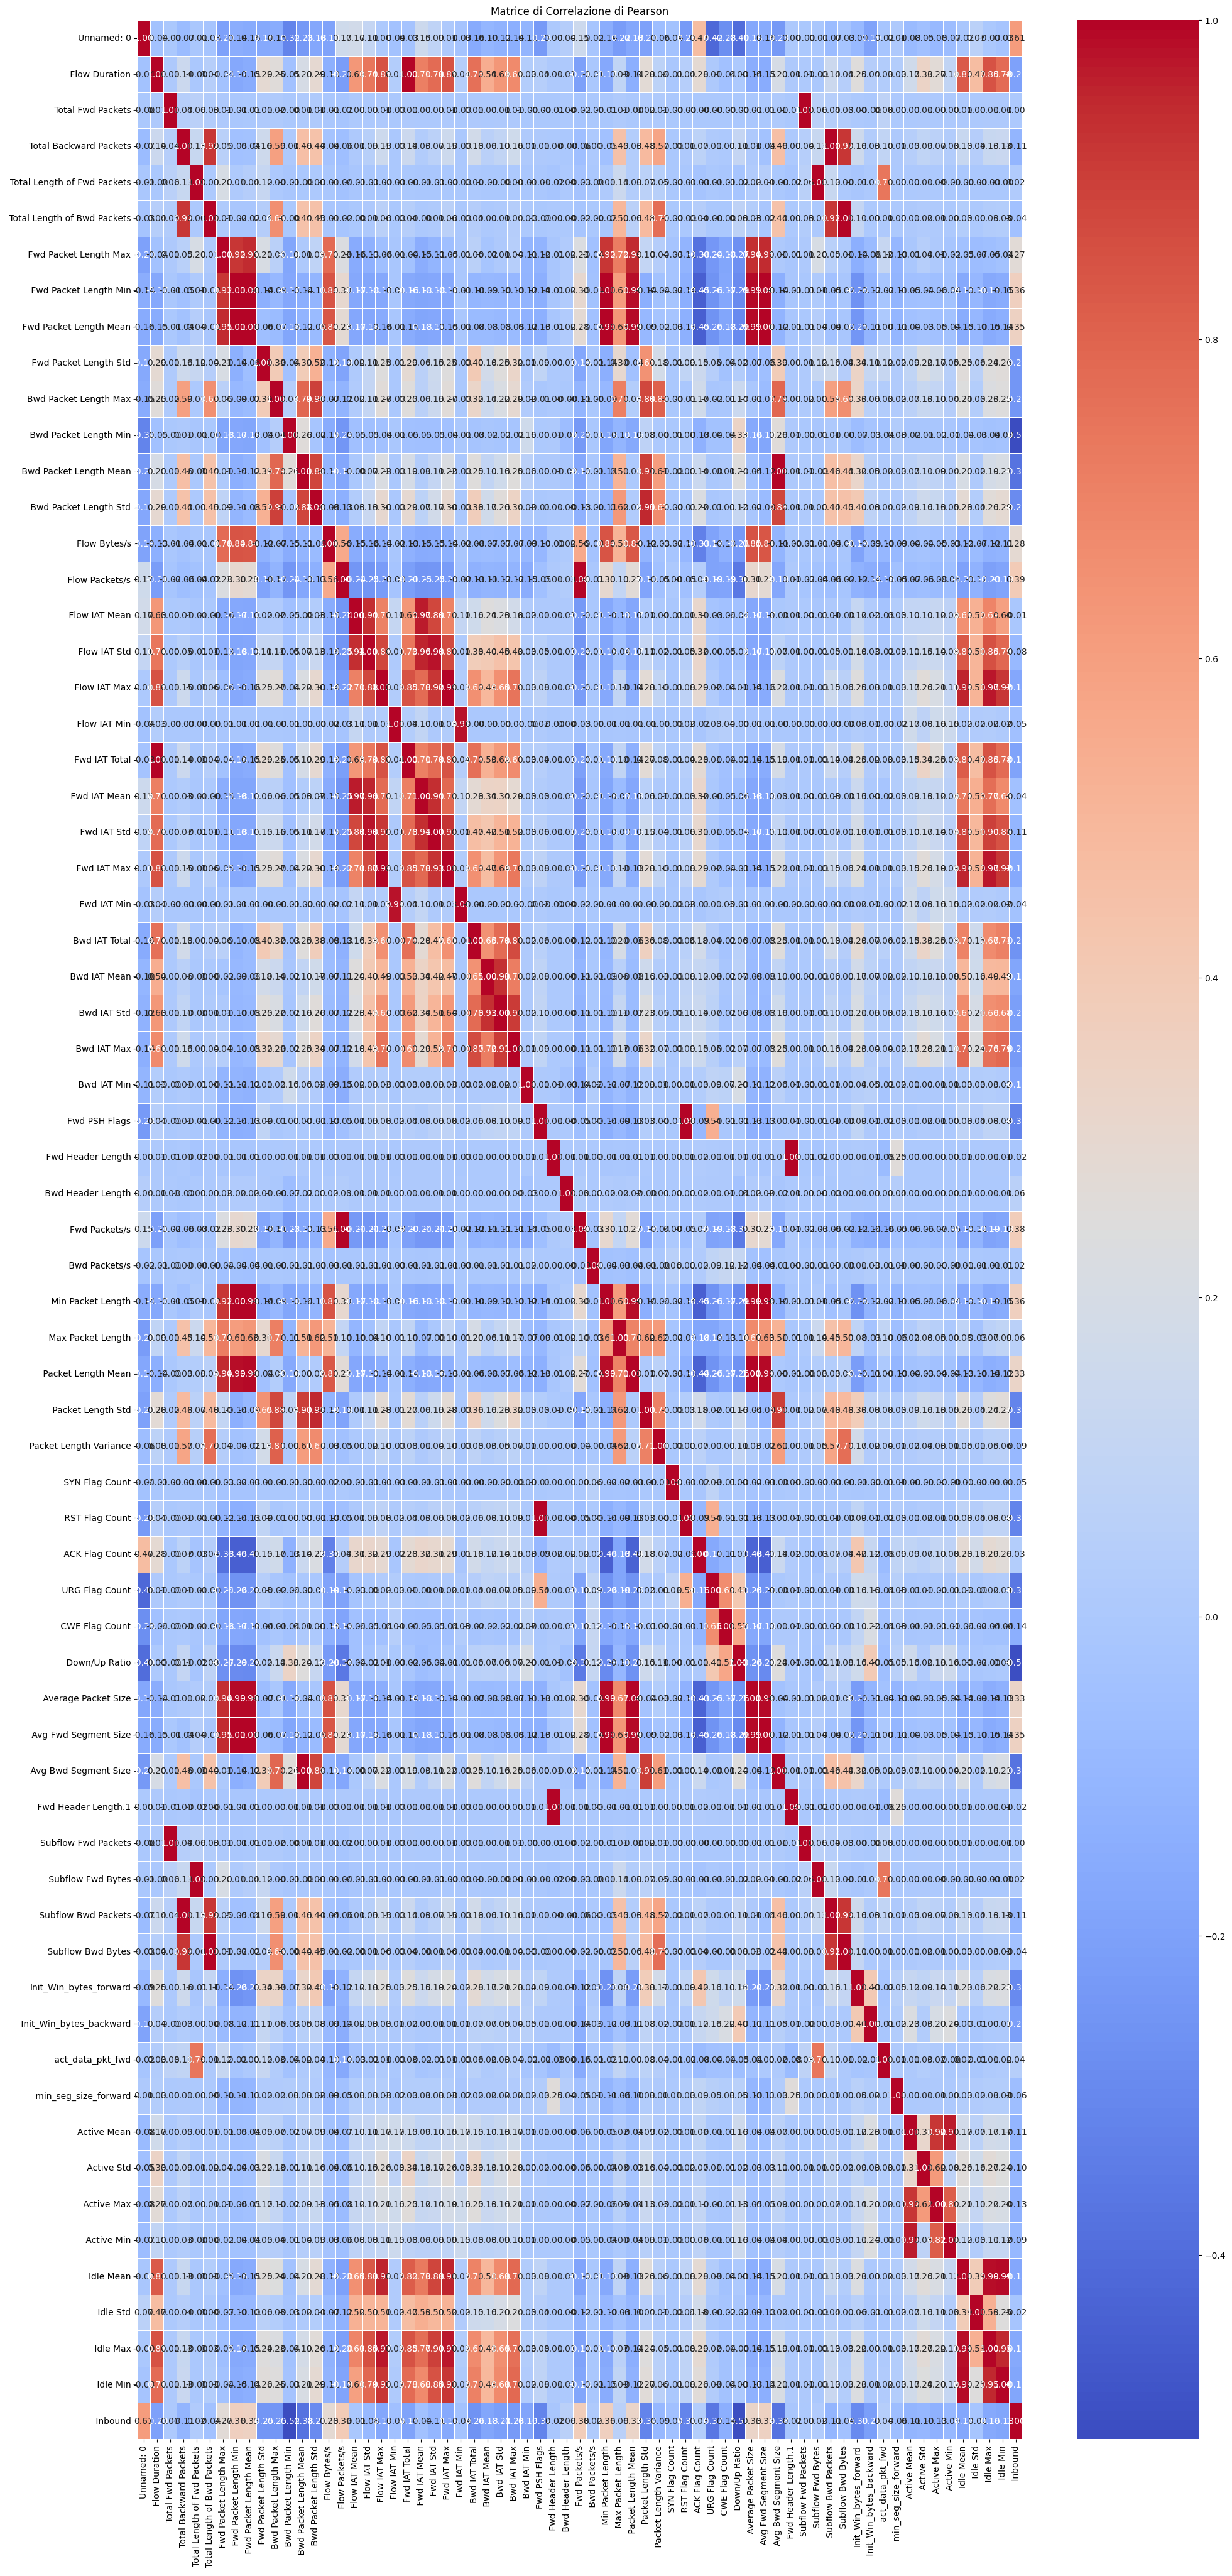

In [80]:
dataframe_predictor=dataset_finale_maligno.drop(columns=[' Label'])
pearson_corr = dataframe_predictor.corr(method='pearson')

# Imposta la dimensione della figura
plt.figure(figsize=(50, 50))

plt.subplot(1, 2, 1)  
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice di Correlazione di Pearson')

plt.show()

In [81]:
print("Coppie di variabili con correlazione di Pearson > 0.9:")
pearson_high_corr = [(col1, col2, pearson_corr.loc[col1, col2]) 
                     for col1 in pearson_corr.columns for col2 in pearson_corr.columns 
                     if col1 != col2 and pearson_corr.loc[col1, col2] > 0.9]
#for col1, col2, coeff in pearson_high_corr:
    #print(f"{col1} e {col2}: {coeff:.2f}")
print(len(pearson_high_corr))

Coppie di variabili con correlazione di Pearson > 0.9:
118


In [82]:
def correlation(dataset, soglia):
    col_corr = set()  # Set of all the names of correlated columns
    
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):    
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > soglia: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                
    return col_corr

In [85]:
df_correlazione = dataframe_predictor.corr()
df_correlazione = df_correlazione.abs().unstack() # absolute value of corr coef
df_correlazione = df_correlazione.sort_values(ascending=False)
df_correlazione = df_correlazione[df_correlazione > 0.9]
df_correlazione = df_correlazione[df_correlazione < 1]
df_correlazione = pd.DataFrame(df_correlazione).reset_index()
df_correlazione.columns = ['attributo1', 'attributo2', 'coefficiente']
df_correlazione.shape

(104, 3)

In [86]:
df_correlazione

,attributo1,attributo2,coefficiente
0,Bwd Packet Length Mean,Avg Bwd Segment Size,1.000000
1,Avg Bwd Segment Size,Bwd Packet Length Mean,1.000000
2,Fwd Packets/s,Flow Packets/s,0.999635
3,Flow Packets/s,Fwd Packets/s,0.999635
4,Fwd Packet Length Min,Min Packet Length,0.999381
...,...,...,...
99,Bwd IAT Std,Bwd IAT Max,0.907528
100,Packet Length Std,Avg Bwd Segment Size,0.901298
101,Avg Bwd Segment Size,Packet Length Std,0.901298
102,Bwd Packet Length Mean,Packet Length Std,0.901298


In [101]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in df_correlazione["attributo1"].unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = df_correlazione[df_correlazione["attributo1"] == feature]
        grouped_feature_ls = grouped_feature_ls + list(correlated_block["attributo2"].unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)
i=0
for group in correlated_groups:
    i=i+1
    print("gruppo numero:", i)
    print(group)
    print()
print(len(correlated_groups))

gruppo numero: 1
                  attributo1             attributo2  coefficiente
0     Bwd Packet Length Mean   Avg Bwd Segment Size      1.000000
102   Bwd Packet Length Mean      Packet Length Std      0.901298

gruppo numero: 2
      attributo1       attributo2  coefficiente
2  Fwd Packets/s   Flow Packets/s      0.999635

gruppo numero: 3
                attributo1               attributo2  coefficiente
4    Fwd Packet Length Min        Min Packet Length      0.999381
11   Fwd Packet Length Min   Fwd Packet Length Mean      0.995315
13   Fwd Packet Length Min     Avg Fwd Segment Size      0.995315
25   Fwd Packet Length Min      Average Packet Size      0.991270
35   Fwd Packet Length Min       Packet Length Mean      0.986045
79   Fwd Packet Length Min    Fwd Packet Length Max      0.922919

gruppo numero: 4
      attributo1      attributo2  coefficiente
6  Fwd IAT Total   Flow Duration      0.998132

gruppo numero: 5
      attributo1     attributo2  coefficiente
14   Fwd IAT Ma

In [102]:
group_head = []
for group in correlated_groups:
    group_head.append(group.iloc[0,0])

In [103]:
features_to_remove = [feature for feature in grouped_feature_ls if feature not in group_head]
len(features_to_remove)

28

In [104]:
features_to_remove

[' Avg Bwd Segment Size',
 ' Packet Length Std',
 ' Flow Packets/s',
 ' Min Packet Length',
 ' Fwd Packet Length Mean',
 ' Avg Fwd Segment Size',
 ' Average Packet Size',
 ' Packet Length Mean',
 ' Fwd Packet Length Max',
 ' Flow Duration',
 ' Flow IAT Max',
 ' Idle Max',
 'Idle Mean',
 ' Fwd IAT Std',
 ' Idle Min',
 ' Fwd IAT Std',
 ' Fwd IAT Mean',
 ' Flow IAT Mean',
 ' Flow IAT Min',
 'Active Mean',
 ' Packet Length Std',
 ' Bwd IAT Std',
 ' Total Backward Packets',
 ' Subflow Bwd Packets',
 ' Total Backward Packets',
 ' Subflow Bwd Packets',
 'Active Mean',
 ' Bwd IAT Std']

In [106]:
df_no_correlation = dataset_finale_maligno.drop(columns=features_to_remove)

In [108]:
df_no_correlation.shape

(154293, 46)

In [109]:
df_no_correlation.to_csv("dataset_no_correlazioni.csv")